# Import all the required libraries

---



In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [3]:


START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689533,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000


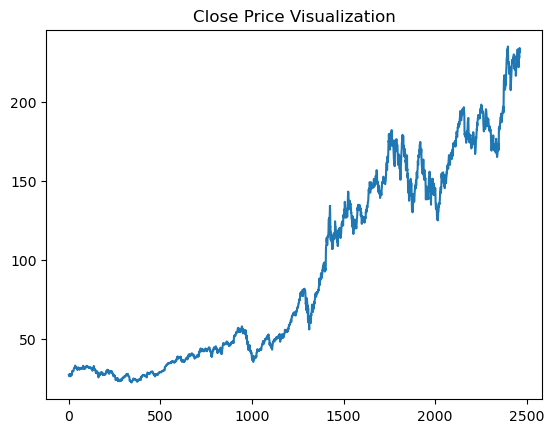

In [6]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,27.847500,27.860001,26.837500,27.332500,212818400
1,27.072500,27.162500,26.352501,26.562500,257142000
2,26.635000,26.857500,26.157499,26.565001,263188400
3,26.799999,27.049999,26.674999,26.937500,160423600
4,27.307501,28.037500,27.174999,27.972500,237458000
...,...,...,...,...,...
2459,227.779999,229.500000,227.169998,229.039993,28183500
2460,229.300003,229.410004,227.339996,227.550003,31759200
2461,228.699997,231.729996,228.600006,231.300003,39882100
2462,233.610001,237.490005,232.369995,233.850006,64707600


# Plotting moving averages of 100 day

---



In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2459    217.378400
2460    217.743500
2461    218.133000
2462    218.562500
2463    219.006777
Name: Close, Length: 2464, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

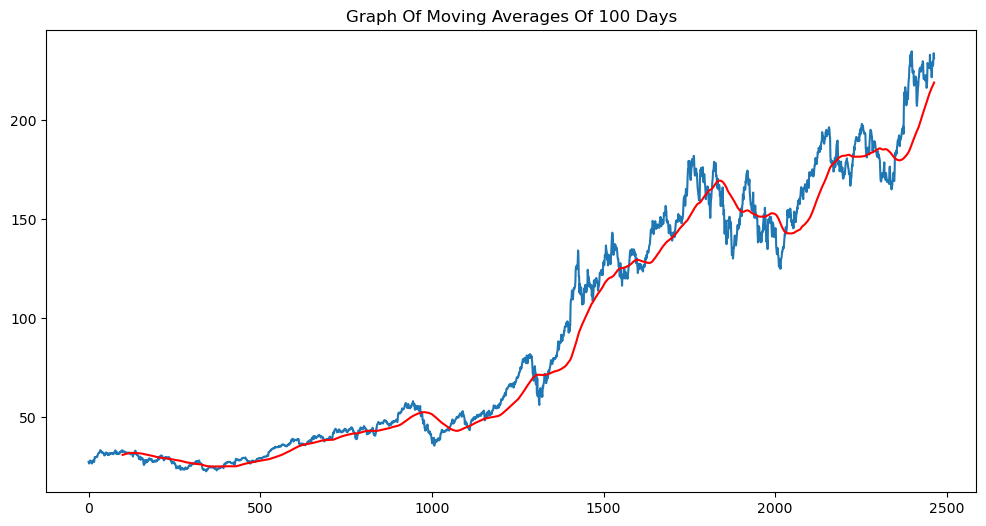

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2459    198.582100
2460    198.754600
2461    198.945350
2462    199.146700
2463    199.340588
Name: Close, Length: 2464, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

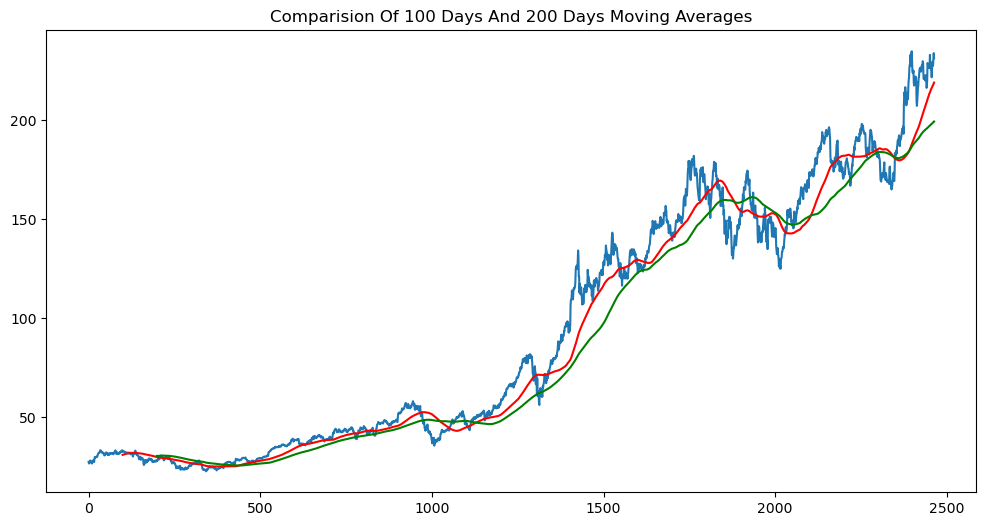

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [21]:
df.shape

(2464, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [27]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1724, 7)
(740, 7)


In [29]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373960,212818400
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689533,263188400
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021715,160423600
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944681,237458000


In [31]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1724,2021-11-05,151.889999,152.199997,150.059998,151.279999,149.005615,65463900
1725,2021-11-08,151.410004,151.570007,150.160004,150.440002,148.178253,55020900
1726,2021-11-09,150.199997,151.429993,150.059998,150.809998,148.542694,56787900
1727,2021-11-10,150.020004,150.130005,147.850006,147.919998,145.696136,65187100
1728,2021-11-11,148.960007,149.429993,147.679993,147.869995,145.646881,41000000


# Using MinMax scaler for normalization of the dataset

---



In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [35]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [38]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03540137],
       [0.0296596 ],
       [0.02967825],
       ...,
       [0.95026287],
       [0.96122444],
       [0.95727232]])

In [40]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [42]:
x_train.shape

(1624, 100, 1)

# ML Model (LSTM)

---



In [45]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [47]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\RAMA HARSHITA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [74]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 144ms/step - MAE: 0.1707 - loss: 0.0651 - val_MAE: 0.0872 - val_loss: 0.0106
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - MAE: 0.0682 - loss: 0.0111 - val_MAE: 0.0781 - val_loss: 0.0089
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - MAE: 0.0492 - loss: 0.0061 - val_MAE: 0.0776 - val_loss: 0.0090
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - MAE: 0.0527 - loss: 0.0064 - val_MAE: 0.0775 - val_loss: 0.0086
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - MAE: 0.0444 - loss: 0.0052 - val_MAE: 0.0858 - val_loss: 0.0106
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - MAE: 0.0410 - loss: 0.0046 - val_MAE: 0.0769 - val_loss: 0.0087
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - MAE: 0.0466 - loss: 0.0052 - val_MAE: 0.0805 - val_loss: 0.0091
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - MAE: 0.0410 - loss: 0.0044 - val_MAE: 0.0756 - val_loss: 0.0085
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - M

In [76]:
model.save('keras_model.keras')

In [54]:

test_close.shape
test_close

array([[151.27999878],
       [150.44000244],
       [150.80999756],
       [147.91999817],
       [147.86999512],
       [149.99000549],
       [150.        ],
       [151.        ],
       [153.49000549],
       [157.86999512],
       [160.55000305],
       [161.02000427],
       [161.41000366],
       [161.94000244],
       [156.80999756],
       [160.24000549],
       [165.30000305],
       [164.77000427],
       [163.75999451],
       [161.83999634],
       [165.32000732],
       [171.17999268],
       [175.08000183],
       [174.55999756],
       [179.44999695],
       [175.74000549],
       [174.33000183],
       [179.30000305],
       [172.25999451],
       [171.13999939],
       [169.75      ],
       [172.99000549],
       [175.63999939],
       [176.27999878],
       [180.33000183],
       [179.28999329],
       [179.38000488],
       [178.19999695],
       [177.57000732],
       [182.00999451],
       [179.69999695],
       [174.91999817],
       [172.        ],
       [172

In [56]:
past_100_days = pd.DataFrame(train_close[-100:])

In [58]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [61]:
final_df = past_100_days._append(test_df, ignore_index = True)

In [63]:
final_df.head()

,0
0,130.149994
1,131.789993
2,130.460007
3,132.300003
4,133.979996


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[4.67212819e-02],
       [6.16575226e-02],
       [4.95447135e-02],
       [6.63024199e-02],
       [8.16028981e-02],
       [7.90528184e-02],
       [7.64117141e-02],
       [7.36794461e-02],
       [8.88888997e-02],
       [1.03005502e-01],
       [1.08743251e-01],
       [1.11566543e-01],
       [1.36065652e-01],
       [1.54827013e-01],
       [1.78051082e-01],
       [1.65938134e-01],
       [1.82969053e-01],
       [1.77413492e-01],
       [1.87795999e-01],
       [2.19763159e-01],
       [2.13661173e-01],
       [1.94626600e-01],
       [1.58743157e-01],
       [1.92440758e-01],
       [1.85610157e-01],
       [1.98360695e-01],
       [2.14389787e-01],
       [2.18306070e-01],
       [1.98087482e-01],
       [1.81785038e-01],
       [1.87795999e-01],
       [1.89799653e-01],
       [1.86703148e-01],
       [2.03460854e-01],
       [1.99726759e-01],
       [2.00728586e-01],
       [1.92349733e-01],
       [1.91894332e-01],
       [1.87431762e-01],
       [1.89799653e-01],


In [67]:
input_data.shape

(840, 1)

# Testing the model

---



In [70]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [72]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(740, 100, 1)
(740,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [78]:
# Making predictions

y_pred = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [79]:
y_pred.shape

(740, 1)

In [82]:
y_test

array([2.39162109e-01, 2.31511870e-01, 2.34881588e-01, 2.08561014e-01,
       2.08105612e-01, 2.27413538e-01, 2.27504562e-01, 2.36612029e-01,
       2.59289673e-01, 2.99180285e-01, 3.23588369e-01, 3.27868890e-01,
       3.31420797e-01, 3.36247743e-01, 2.89526392e-01, 3.20765077e-01,
       3.66848839e-01, 3.62021892e-01, 3.52823261e-01, 3.35336941e-01,
       3.67031027e-01, 4.20400652e-01, 4.55919857e-01, 4.51183935e-01,
       4.95719445e-01, 4.61930819e-01, 4.49089257e-01, 4.94353380e-01,
       4.30236733e-01, 4.20036414e-01, 4.07377040e-01, 4.36885284e-01,
       4.61020017e-01, 4.66848790e-01, 5.03734060e-01, 4.94262216e-01,
       4.95081994e-01, 4.84335110e-01, 4.78597501e-01, 5.19034538e-01,
       4.97996311e-01, 4.54462629e-01, 4.27868841e-01, 4.29417094e-01,
       4.29599282e-01, 4.55919857e-01, 4.60018190e-01, 4.29599282e-01,
       4.37613898e-01, 4.07832441e-01, 3.75318717e-01, 3.59653862e-01,
       3.40528264e-01, 3.33333287e-01, 3.16575581e-01, 3.15755942e-01,
      

In [84]:
y_pred

array([[0.21547256],
       [0.21833265],
       [0.22066574],
       [0.22246757],
       [0.2235296 ],
       [0.22369795],
       [0.22313766],
       [0.22204696],
       [0.22073431],
       [0.21955378],
       [0.21897517],
       [0.21942835],
       [0.22116524],
       [0.22481517],
       [0.23061006],
       [0.23820347],
       [0.24725956],
       [0.2575709 ],
       [0.26870084],
       [0.28030786],
       [0.29180092],
       [0.30281967],
       [0.31350118],
       [0.3243282 ],
       [0.33571255],
       [0.34832034],
       [0.36220422],
       [0.3769043 ],
       [0.392151  ],
       [0.4069991 ],
       [0.42038697],
       [0.43145287],
       [0.4399507 ],
       [0.44620162],
       [0.4507575 ],
       [0.45447755],
       [0.45805654],
       [0.46194923],
       [0.4662384 ],
       [0.4707416 ],
       [0.47558665],
       [0.48067948],
       [0.485391  ],
       [0.48892054],
       [0.4907125 ],
       [0.49055472],
       [0.48873204],
       [0.485

In [86]:
scaler.scale_

array([0.00910747])

In [88]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

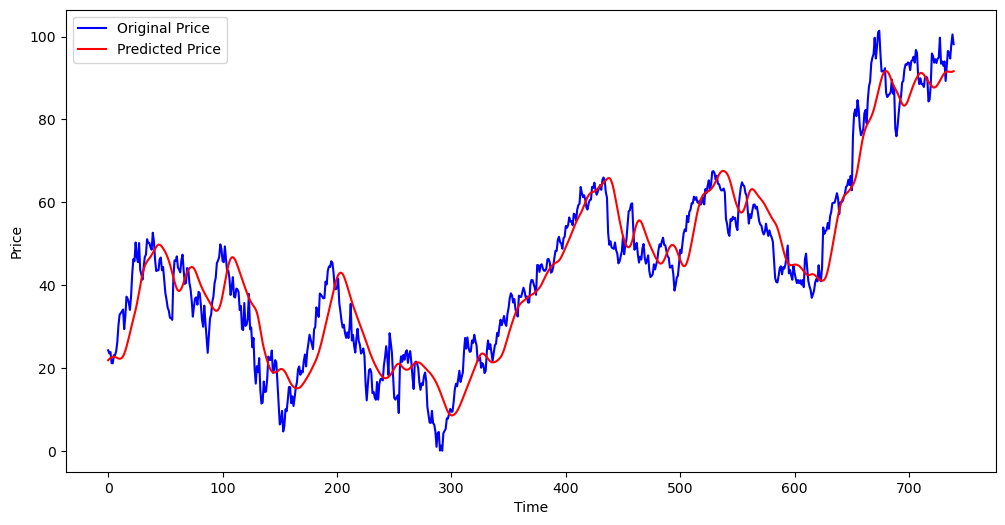

In [90]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [93]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  5.647232936062243
